<a href="https://colab.research.google.com/github/suganraj555/car-insurance-prediction/blob/main/Car_insurance_prediction_miniipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/car.csv')
df=df.dropna()
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16-Mar-39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21-Jan-56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18-Nov-51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05-Mar-64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
6,871024631,0,05-May-65,34.0,1,12.0,"$125,301",Yes,$0,z_No,...,Sports Car,no,$0,0,No,0,"$2,946",7.0,1,Highly Urban/ Urban


In [ ]:
df.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [ ]:
kt=df["CLM_AMT"].tolist()

In [ ]:
ks=[]
from re import sub
from decimal import Decimal
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF8')
for i in kt:
  ks.append(locale.atof(i.strip("$")))
df["CLM_AMT"]=ks


In [ ]:
x=df[["YOJ","AGE","MVR_PTS","CLM_FREQ","CAR_AGE"]]
x

,YOJ,AGE,MVR_PTS,CLM_FREQ,CAR_AGE
0,11.0,60.0,3,2,18.0
1,11.0,43.0,0,0,1.0
2,11.0,48.0,2,0,10.0
3,10.0,35.0,3,2,10.0
6,12.0,34.0,0,0,7.0
...,...,...,...,...,...
10296,11.0,35.0,0,0,8.0
10297,9.0,45.0,2,0,17.0
10299,15.0,48.0,0,0,1.0
10300,7.0,50.0,0,0,11.0


In [ ]:
y=df["CLAIM_FLAG"]
y

0        0
1        0
2        0
3        0
6        1
        ..
10296    0
10297    0
10299    0
10300    0
10301    0
Name: CLAIM_FLAG, Length: 7657, dtype: int64

In [ ]:
y.value_counts()

0    5598
1    2059
Name: CLAIM_FLAG, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_test.head()

,YOJ,AGE,MVR_PTS,CLM_FREQ,CAR_AGE
7837,8.0,47.0,0,0,11.0
8427,9.0,47.0,1,2,13.0
4910,12.0,57.0,4,1,9.0
5608,13.0,40.0,0,0,12.0
8502,11.0,49.0,3,0,5.0


In [ ]:
from sklearn.linear_model import LogisticRegression
Classifier=LogisticRegression(solver='liblinear')
Classifier.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred=Classifier.predict(x_test)
results=pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
results.head(5)

,Actual,Predictions
7837,0,0
8427,0,0
4910,1,0
5608,0,0
8502,0,0


In [ ]:
from sklearn.metrics import accuracy_score
print(100*accuracy_score(y_test,y_pred))

71.10530896431679


In [ ]:
y_pred=Classifier.predict(x_train)
print(100*accuracy_score(y_train,y_pred))

74.95801455495427


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

ValueError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(100*accuracy_score(y_test,y_pred))

65.23063533507397


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)



In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))


In [ ]:
from sklearn.metrics import accuracy_score
print(100*accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
np = GaussianNB()
np.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred2=np.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(100*accuracy_score(y_test,y_pred2))

[[1403  224]
 [ 447  224]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1627
           1       0.50      0.33      0.40       671

    accuracy                           0.71      2298
   macro avg       0.63      0.60      0.60      2298
weighted avg       0.68      0.71      0.69      2298

70.80069625761531


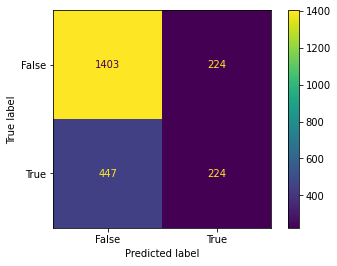

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred3=rf.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
from sklearn.metrics import accuracy_score
print(100*accuracy_score(y_test,y_pred3))

[[1415  212]
 [ 483  188]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80      1627
           1       0.47      0.28      0.35       671

    accuracy                           0.70      2298
   macro avg       0.61      0.57      0.58      2298
weighted avg       0.67      0.70      0.67      2298

69.75630983463881


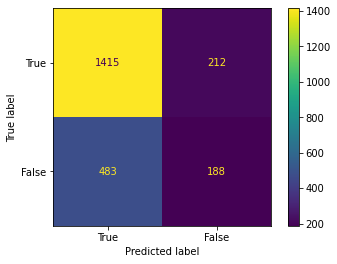

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])

cm_display.plot()
plt.show()

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train,y_train)

XGBClassifier()

In [ ]:
y_pred4=xgb_classifier.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
from sklearn.metrics import accuracy_score
print(100*accuracy_score(y_test,y_pred4))

[[1547   80]
 [ 535  136]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1627
           1       0.63      0.20      0.31       671

    accuracy                           0.73      2298
   macro avg       0.69      0.58      0.57      2298
weighted avg       0.71      0.73      0.68      2298

73.23759791122716


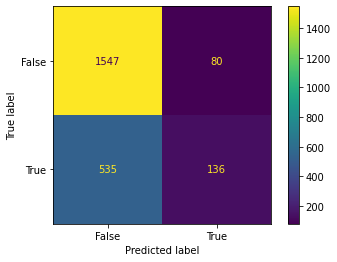

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred4)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
a1=accuracy_score(y_test, y_pred)
a2=accuracy_score(y_test, y_pred2)
a3=accuracy_score(y_test, y_pred3)
a4=accuracy_score(y_test, y_pred4)
a=[a1,a2,a3,a4]
i=['Decision Tree','Naive bayes','RandomForest','Xgboost']
df=pd.DataFrame(a,index=i,columns=['Accuracy'])

ValueError: ignored

In [ ]:
df['Accuracy']=df['Accuracy']*100

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

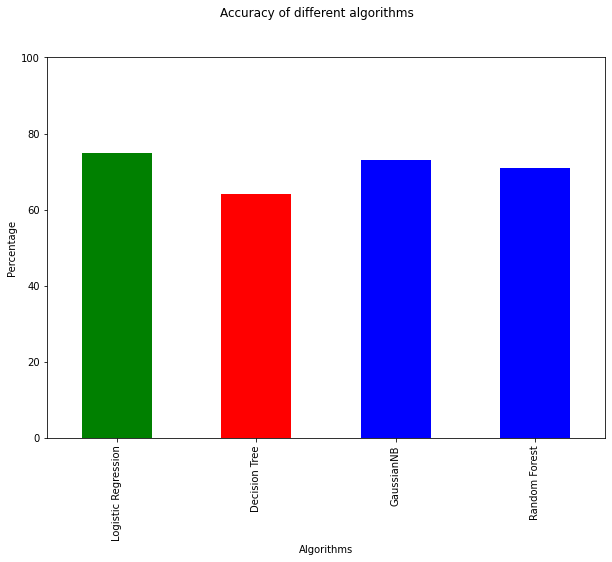

In [ ]:
plt.figure(figsize=(10,7))
plt.suptitle('Accuracy of different algorithms',fontsize=12,color='black')
plt.xlabel("Algorithms")
plt.ylabel("Percentage") 
df = pd.Series({"Logistic Regression":74.95801455495427,"Decision Tree":64.0,"GaussianNB":73.0,"Random Forest":71.0})
df.plot(kind='bar',color=['g','r','b','b'],ylim=[0,100.0]);

In [ ]:
feature_importances=pd.DataFrame(rf.feature_importances_,index=x_train.columns,columns=['importance']).sort_values('importance')
feature_importances

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100) 
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
X, y = datasets.make_classification()
X_train, X_val, Y_train, Y_val = train_test_split(X,
                                                  y,
                                                  test_size = 0.2,
                                                  random_state=2022)
print(X_train.shape, X_val.shape)

NameError: ignored

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(Y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(Y_val,
                             model.predict(X_val))*100)

In [ ]:

model = RandomForestClassifier(max_depth=2,
                               random_state=22)
model.fit(X_train, Y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(Y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(Y_val,
                             model.predict(X_val))*100)

In [ ]:
model = RandomForestClassifier(n_estimators=30,
                               random_state=22)
model.fit(X_train, Y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(Y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(Y_val,
                             model.predict(X_val))*100)

In [ ]:
model = RandomForestClassifier(
    max_depth=2, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=22)
 
model.fit(X_train, Y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(
          Y_train, model.predict(X_train))*100)
 
print('Validation Accuracy : ', metrics.accuracy_score(
    Y_val, model.predict(X_val))*100)